# Machine learning for classification

## Table des matières
1. [Introduction](#introduction)
2. [The data](#The-data)
3. [A first model of machine learning. The naive Bayes model](#A-first-model-of-machine-learning.-The-naive-Bayes-model)
4. [The Scikit learn library](#scikit-learn)
5. [Classification learning machines](#classification)

## Introduction

### Goal 

- Understand classification machine learning methods, from a methodological and practical point of view. 
- To apply models and to tune the appropriate parameters on several data sets using the ‘Python’ language. 



In [ ]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import statistics as stat
import math

#Accuracy, Precision, recall and F1-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## The data

In [6]:
#The data

N=500
xgauss1=[rd.gauss(0,1) for i in range(N)]
xgauss2=[rd.gauss(0,1) for i in range(N)]


### A labeled dataset

Simulate a two dimensional sample composed of a mixture of two gaussians as illustrated in Figure 1 (center).

Group I (Red Points)
- Number of observations: **n = 100**
- Distribution: Multivariate normal distribution N([2.5, 2.5\],$\begin{pmatrix}
2 & -0.8 \\ 
-0.8 & 2
\end{pmatrix}$)
- Label: \( Y = 1 \)
Each observation in Group I is represented as a red point in the dataset.
This dataset is suitable for testing clustering, classification algorithms, or visualizing multivariate normal distributions.

Group II (Blue Points)
- Number of observations: **n = 100**
- Distribution: Multivariate normal distribution N([0, 0\],$\begin{pmatrix}
1 & 0 \\ 
0 & 1
\end{pmatrix}$)

- Label: \( Y = 0 \)


In [12]:
#group I

mean_group_I = [2.5, 2.5]
cov_group_I = [[2.0, -0.8], [-0.8, 2.0]]

n1 = 100

group_I_data = np.random.multivariate_normal(mean_group_I, cov_group_I, n1)

labels_group_I = np.ones(n1)

mean_I = np.mean(group_I_data)
deviation_I = np.std(group_I_data)
correlation_matrix_group_I = np.corrcoef(group_I_data)

#group II

mean_group_II = [0.0, 0.0]
cov_group_II = [[1.0, 0.0], [0.0, 1.0]]

n2 = 200

group_II_data = np.random.multivariate_normal(mean_group_II, cov_group_II, n2)

labels_group_II = np.zeros(n2)

mean_II = np.mean(group_II_data)
deviation_II = np.std(group_II_data)
correlation_matrix_group_II = np.corrcoef(group_II_data)


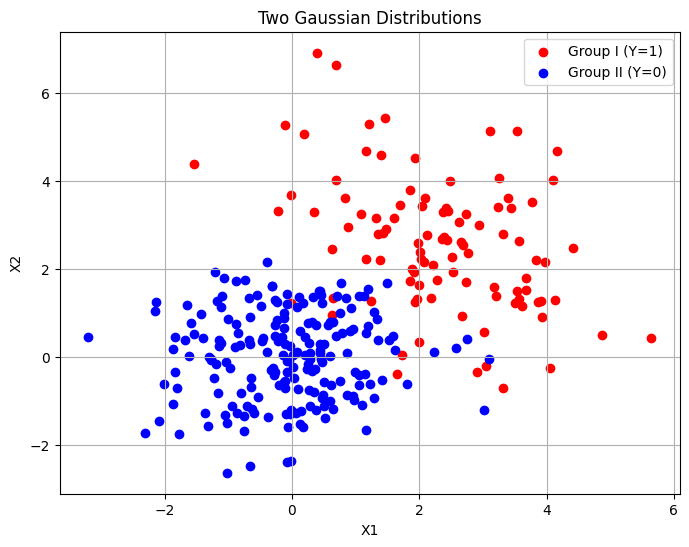

In [ ]:
plt.figure(figsize=(8, 6))

# Groupe I (Rouge)
plt.scatter(group_I_data[:, 0], group_I_data[:, 1], color='red', label="Group I (Y=1)")

# Groupe II (Bleu)
plt.scatter(group_II_data[:, 0], group_II_data[:, 1], color='blue', label="Group II (Y=0)")

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Two Gaussian Distributions")
plt.grid()
plt.show()


## A first model of machine learning. The naive Bayes model

### Model Calibration

This section describes the implementation of the Naive Bayes model for 2D inputs. The goal is to calibrate the model using a training dataset and then make predictions based on the Maximum A Posteriori (MAP) decision rule.

1. **Prior Probability**: Compute the prior probability for each class based on the frequency of each class in the training data.
   
2. **Likelihood Probability**: Compute the likelihood for each input given the class. This is done by modeling the data for each class using a Gaussian distribution (for simplicity).
   
3. **Posterior Probability**: Using Bayes' theorem, calculate the posterior probability for each class given the observed input data. The class with the highest posterior probability is assigned to each observation.
   
4. **MAP Decision**: Assign each observation to the class with the highest posterior probability.

## Model Evaluation

After training the Naive Bayes model, we evaluate its performance using various metrics:

- **Number of Errors**: Count the number of misclassified observations.
  
- **False Positives & False Negatives**: Identify the number of false positive and false negative observations to analyze classification errors specific to each class.

### Performance Metrics:

1. **Accuracy**: The proportion of correctly classified observations out of the total number of observations.

   $$
   \text{Accuracy} = \frac{\text{Number of Correctly Classified Observations}}{\text{Total Number of Observations}}
   $$

2. **Precision**: The proportion of true positives among all the observations predicted as positive.

   $$
   \text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}
   $$

3. **Recall**: The proportion of true positives among all actual positives.

   $$
   \text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}
   $$

   Recall is particularly important when the goal is to minimize false negatives, such as in medical diagnoses or fraud detection.

4. **F1-Score**: The harmonic mean of precision and recall, providing a single metric that balances both.

   $$
   F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
   $$

These metrics give us a comprehensive understanding of the model's performance and its ability to classify observations correctly.



In [ ]:
# Fonction pour calculer les priorités P(C)
def compute_prior(labels):
    n = len(labels)
    unique, counts = np.unique(labels, return_counts=True)
    priors = counts / n
    return dict(zip(unique, priors))

# Fonction pour calculer la vraisemblance P(X|C) sous l'hypothèse Gaussienne
def compute_likelihood(X, labels):
    classes = np.unique(labels)
    likelihood = {}
    for c in classes:
        # Données correspondant à la classe c
        X_c = X[labels == c]

        # Vérifiez si X_c a la bonne forme (n_samples, n_features)
        if X_c.ndim == 1:
            X_c = X_c[:, np.newaxis]  # Ajoutez une dimension si c'est unidimensionnel

        mean = np.mean(X_c, axis=0)
        var = np.var(X_c, axis=0)

        likelihood[c] = {'mean': mean, 'var': var}
    return likelihood

# Fonction pour calculer la probabilité P(C|X) par Bayes
def compute_posterior(X, priors, likelihood):
    posteriors = []

    for x in X:
        class_posteriors = []
        for c in priors.keys():
            prior = priors[c]
            likelihoods = likelihood[c]['mean']  # Vous devez calculer la vraisemblance pour chaque caractéristique
            # Calculez la probabilité a posteriori en multipliant la vraisemblance et le prior
            posterior = prior * np.prod(likelihoods)  # Exemple simplifié
            class_posteriors.append(posterior)
        posteriors.append(class_posteriors)

    return np.array(posteriors)


# Fonction pour prédire la classe avec le MAP
def predict(X, priors, likelihood):
    posteriors = compute_posterior(X, priors, likelihood)
    return np.argmax(posteriors, axis=1)

# Exemple d'entraînement avec les données simulées
# Simuler des données d'exemple (remplacer par vos données)
group_I_data = np.random.multivariate_normal([2.5, 2.5], [[2.0, -0.8], [-0.8, 2.0]], 100)
group_II_data = np.random.multivariate_normal([0.0, 0.0], [[1.0, 0.0], [0.0, 1.0]], 200)

# Création des labels
labels_group_I = np.ones(100)
labels_group_II = np.zeros(200)

# Données d'entraînement et labels
X_train = np.vstack([group_I_data, group_II_data])
y_train = np.hstack([labels_group_I, labels_group_II])

# Calcul des priorités et des vraisemblances
priors = compute_prior(y_train)
likelihood = compute_likelihood(X_train, y_train)

# Prédictions avec le modèle Naive Bayes
y_pred = predict(X_train, priors, likelihood)


In [ ]:
# Calcul des indicateurs
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

# Affichage des résultats
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.3333333333333333
Precision: 0.3333333333333333
Recall: 1.0
F1 Score: 0.5


In [18]:
from sklearn.metrics import confusion_matrix

# Matrice de confusion
cm = confusion_matrix(y_train, y_pred)

# Nombre d'erreurs, faux positifs et faux négatifs
total_errors = np.sum(cm) - np.trace(cm)
false_positive = cm[0, 1]
false_negative = cm[1, 0]

print(f"Total Errors: {total_errors}")
print(f"False Positives: {false_positive}")
print(f"False Negatives: {false_negative}")


Total Errors: 200
False Positives: 200
False Negatives: 0
